In [1]:
from collections import Counter

import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt

In [2]:
x, y = fetch_openml('mnist_784', return_X_y=True)
y = y.astype(np.int32)

In [3]:
print('Total images {}, Image size in pixels {}'.format(*x.shape))

Total images 70000, Image size in pixels 784


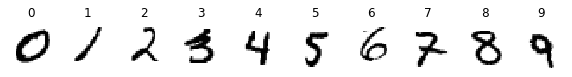

In [4]:
cols = 10
rows = 1
plt.figure(figsize=(10, 10))
for l in range(10): # Digits from 0 to 9
    plt.subplot(rows, cols, l + 1)
    l_digits = x[y == l]
    idx = np.random.randint(0, high=l_digits.shape[0], size=1)
    
    im = l_digits[idx]
    im = im.astype(np.float32) / 255.
    im = im.reshape(28, 28)
  
    plt.title(l)
    plt.imshow(im, cmap='binary')
    plt.axis('off')

# Train

In [5]:
# Create two data sets, one for training and the other one to evaluate the 
# resulting model
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=.33, 
                                                    random_state=42)

In [6]:
# We can define custom transformers of pipelines
class ImageScaler(BaseEstimator, TransformerMixin):
    def __init__(self, scale_factor):
        self.scale_factor = scale_factor

    def fit(self, x, y=None):
        return self
  
    def transform(self, x):
        x = x.astype(np.float64)
        x = x / float(self.scale_factor)
        return x

preprocessing_pipeline = Pipeline([('scale', ImageScaler(255)), 
                                   ('standardize', StandardScaler())])


In [7]:
# Apply the transformation
# Note: That we also fit the pipeline here, this is because
# we want the StandardScaler to learn the mean and std deviation
# of the training set
x_train_prep = preprocessing_pipeline.fit_transform(x_train)

In [8]:
# Train the model
rnd_forest = RandomForestClassifier(n_estimators=20, max_depth=10)
rnd_forest.fit(x_train_prep, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Evaluate the model

In [9]:
# Note: Here we only call transform because we are using the mean and std
# learned from the training set
x_test_prep = preprocessing_pipeline.transform(x_test)

In [10]:
# Make predictions
y_pred = rnd_forest.predict(x_test_prep)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2267
           1       0.95      0.98      0.97      2603
           2       0.93      0.94      0.94      2350
           3       0.93      0.90      0.91      2383
           4       0.93      0.92      0.93      2144
           5       0.94      0.92      0.93      2107
           6       0.96      0.96      0.96      2294
           7       0.94      0.93      0.94      2455
           8       0.92      0.90      0.91      2196
           9       0.88      0.91      0.89      2301

    accuracy                           0.94     23100
   macro avg       0.94      0.93      0.93     23100
weighted avg       0.94      0.94      0.94     23100



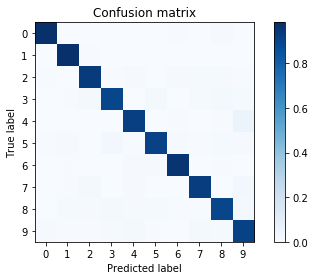

In [11]:
def plot_confusion_matrix(y_true, y_pred,
                          cmap=plt.cm.Blues):

    title = 'Confusion matrix'
    cm = confusion_matrix(y_true, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    fig.tight_layout()

print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)
plt.show()